In [304]:
import pandas as pd
import numpy as np
import json
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from tensorflow import keras
from imblearn.over_sampling import RandomOverSampler

In [305]:
x_src_path = '../Dataset/MixedDataSet.json'
y_src_path = '../DataBook/Mixed_Data_Analyst.xlsx'

In [306]:
data = pd.read_json(x_src_path)

In [307]:
df_supervision = pd.read_excel(y_src_path)
plagiarised_array = df_supervision['Plagiarised'].astype(int).values

In [308]:
X = np.nan_to_num(data.values, nan=0, copy=True).astype(int)
y = plagiarised_array
ros = RandomOverSampler(random_state=22)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [309]:
len(y_resampled)

224

In [310]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
#seed 32 results 100% on test score 24

In [311]:
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    print("this stage is " + str(i))
    count_y_train_1 = np.sum(y_train == 1)
    count_y_test_1 = np.sum(y_test == 1)
    print(count_y_train_1)
    print(count_y_test_1)
    print("")

this stage is 0
17
4

this stage is 1
14
7

this stage is 2
17
4

this stage is 3
18
3

this stage is 4
15
6

this stage is 5
17
4

this stage is 6
17
4

this stage is 7
20
1

this stage is 8
15
6

this stage is 9
10
11

this stage is 10
17
4

this stage is 11
19
2

this stage is 12
18
3

this stage is 13
16
5

this stage is 14
16
5

this stage is 15
15
6

this stage is 16
19
2

this stage is 17
17
4

this stage is 18
16
5

this stage is 19
20
1

this stage is 20
17
4

this stage is 21
16
5

this stage is 22
20
1

this stage is 23
20
1

this stage is 24
16
5

this stage is 25
17
4

this stage is 26
16
5

this stage is 27
18
3

this stage is 28
16
5

this stage is 29
18
3

this stage is 30
19
2

this stage is 31
15
6

this stage is 32
16
5

this stage is 33
18
3

this stage is 34
18
3

this stage is 35
17
4

this stage is 36
17
4

this stage is 37
17
4

this stage is 38
18
3

this stage is 39
16
5

this stage is 40
15
6

this stage is 41
19
2

this stage is 42
18
3

this stage is 43
16


In [312]:
p = Perceptron()
p.fit(X_train,y_train)

print(f"Training data score: {p.score(X_train, y_train)}")
print(f"Test data score: {p.score(X_test, y_test)}")

Training data score: 1.0
Test data score: 0.7037037037037037


In [313]:
# predictions = p.predict(X_test)
# for i in range(len(X_test)):
#     print("Predicted:", predictions[i], "Actual:", y_test[i])

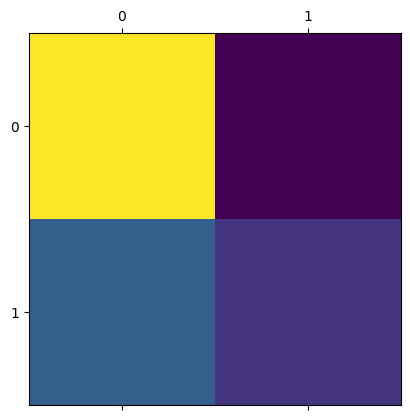

In [314]:
cm = confusion_matrix( p.predict(X_test), y_test)
# plt.set_cmap()
plt.matshow(cm)

In [315]:
modelNames = [
    '1d',
    '2d',
    '3d',
    '4d',
    '5d',
    '6d',
    '7d'
]

NODES_PER_HIDDEN_LAYER = 512

models = [ 

    keras.models.Sequential([
    keras.layers.Input(shape=(75711,)),
    keras.layers.Dense(2, activation='softmax')
]),

    keras.models.Sequential([
    keras.layers.Input(shape=(75711,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
]),

 keras.models.Sequential([
    keras.layers.Input(shape=(75711,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
]),

 keras.models.Sequential([
    keras.layers.Input(shape=(75711,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
]),

 keras.models.Sequential([
    keras.layers.Input(shape=(75711,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
]),

keras.models.Sequential([
    keras.layers.Input(shape=(75711,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
]),

keras.models.Sequential([
    keras.layers.Input(shape=(75711,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

]

ResourceExhaustedError: {{function_node __wrapped__AddV2_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[75711,512] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu [Op:AddV2] name: 

In [ ]:
LOSS_FN = keras.losses.sparse_categorical_crossentropy

for model in models:
    model.compile(optimizer='adam',loss=LOSS_FN,metrics=['accuracy'])

In [ ]:
TRAINING_EPOCHS = 20

# train all models
for model, name in zip(models, modelNames):
    print(f'training model {name}')
    model.fit(X_train, y_train, epochs=TRAINING_EPOCHS)


training model 1d
Epoch 1/20
4/4 [==============================] - 0s 5ms/step - loss: 5613.9932 - accuracy: 0.8208
Epoch 2/20
4/4 [==============================] - 0s 4ms/step - loss: 8370.4355 - accuracy: 0.7453
Epoch 3/20
4/4 [==============================] - 0s 3ms/step - loss: 6599.4795 - accuracy: 0.8585
Epoch 4/20
4/4 [==============================] - 0s 7ms/step - loss: 5362.2461 - accuracy: 0.7453
Epoch 5/20
4/4 [==============================] - 0s 4ms/step - loss: 1913.9125 - accuracy: 0.8774
Epoch 6/20
4/4 [==============================] - 0s 4ms/step - loss: 3808.9270 - accuracy: 0.8396
Epoch 7/20
4/4 [==============================] - 0s 3ms/step - loss: 2026.7698 - accuracy: 0.9245
Epoch 8/20
4/4 [==============================] - 0s 6ms/step - loss: 2303.0049 - accuracy: 0.8774
Epoch 9/20
4/4 [==============================] - 0s 5ms/step - loss: 1130.7849 - accuracy: 0.8962
Epoch 10/20
4/4 [==============================] - 0s 4ms/step - loss: 357.7960 - accuracy:

In [ ]:
# get all model accuracy scores on test data
scores = [model.evaluate(X_test,y_test)[1] for model in models]

1/1 [==============================] - 0s 115ms/step - loss: 91.7594 - accuracy: 0.5926


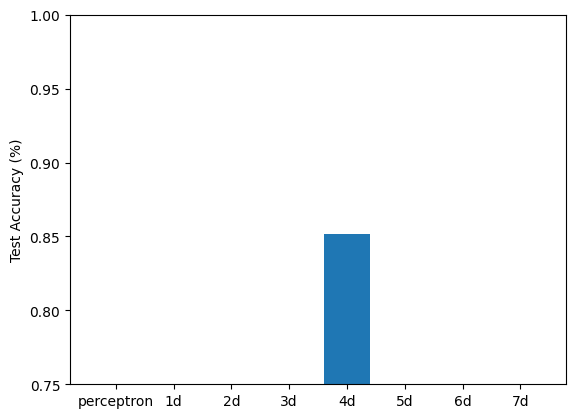

In [ ]:
modelNames.insert(0, 'perceptron')
scores.insert(0, p.score(X_test, y_test) )

plt.bar(modelNames,scores)
plt.ylim(0.75, 1.0)
plt.ylabel('Test Accuracy (%)') 
plt.show()